In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from minepy import MINE

import csv


In [2]:
'''定义两个差分方程https://skccm.readthedocs.io/en/latest/quick-example.html
论文Distinguishing time-delayed causal interactions using convergent cross mapping
'''
def coupled_logistic(rx1, rx2, b12, b21, time,ts_length):
    x1 = np.zeros(ts_length)
    x2 = np.zeros(ts_length)
    
    x1[0] = 0.2
    x2[0] = 0.4

    for i in range(ts_length-1):

        x1[i+1] = x1[i] * (rx1 - rx1 * x1[i] - b21 * x2[i])
        x2[i+1] = x2[i] * (rx2 - rx2 * x2[i] - b12 * x1[i-time])

    return x1,x2
#式中，time是x1对x2影响的时间延迟

获得时滞数据

In [3]:
rx1 = 3.78 #决定了x1序列的混沌行为
rx2 = 3.77 #determines chaotic behavior of the x2 series
b12 = 0.08 #Influence of x1 on x2
b21 = 0.07 #Influence of x2 on x1
time = 6#time是x1对x2影响的时间延迟
ts_length = 1000
x1,x2 = coupled_logistic(rx1,rx2,b12,b21,time,ts_length)

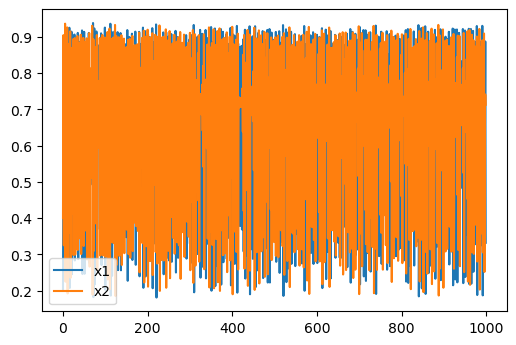

In [4]:
plt.figure(1,dpi=100)

plt.plot(x1,label = "x1")
plt.plot(x2,label = "x2")
plt.legend()
plt.show()

构建x1时间延迟数据集

In [5]:
#array改为dataframe
x_1 = pd.DataFrame(x1,columns=['x_1'])
x_2 = pd.DataFrame(x2,columns=['x_2'])
x_1.shape

(1000, 1)

In [6]:
x_2 = x_2.iloc[10:800,[0]]#原始数据
x_2 = x_2.reset_index(drop=True)#更改索引
x_2.columns=['x_2']#重命名列名
x_t = x_1.iloc[10:800,[0]]#原始数据
x_t = x_t.reset_index(drop=True)#更改索引
x_t.columns=['x_1']#重命名列名


x_t1 = x_1.iloc[9:799,[0]]
x_t1 = x_t1.reset_index(drop=True)#更改索引
x_t1.columns=['x_t1']#重命名列名

x_t2 = x_1.iloc[8:798,[0]]
x_t2 = x_t2.reset_index(drop=True)#更改索引
x_t2.columns=['x_t2']#重命名列名
x_t3 = x_1.iloc[7:797,[0]]
x_t3 = x_t3.reset_index(drop=True)#更改索引
x_t3.columns=['x_t3']#重命名列名
x_t4 = x_1.iloc[6:796,[0]]
x_t4 = x_t4.reset_index(drop=True)#更改索引
x_t4.columns=['x_t4']#重命名列名
x_t5 = x_1.iloc[5:795,[0]]
x_t5 = x_t5.reset_index(drop=True)#更改索引
x_t5.columns=['x_t5']#重命名列名
x_t6 = x_1.iloc[4:794,[0]]
x_t6 = x_t6.reset_index(drop=True)#更改索引
x_t6.columns=['x_t6']#重命名列名
x_t7 = x_1.iloc[3:793,[0]]
x_t7 = x_t7.reset_index(drop=True)#更改索引
x_t7.columns=['x_t7']#重命名列名
x_t8 = x_1.iloc[2:792,[0]]
x_t8 = x_t8.reset_index(drop=True)#更改索引
x_t8.columns=['x_t8']#重命名列名
x_t9 = x_1.iloc[1:791,[0]]
x_t9 = x_t9.reset_index(drop=True)#更改索引
x_t9.columns=['x_t9']#重命名列名
x_t10 = x_1.iloc[0:790,[0]]
x_t10 = x_t10.reset_index(drop=True)#更改索引
x_t10.columns=['x_t10']#重命名列名

data =  pd.concat([x_2,x_t,x_t1,x_t2,x_t3,x_t4,x_t5,\
                   x_t6,x_t7,x_t8,x_t9,x_t10],axis=1)

data

,x_2,x_1,x_t1,x_t2,x_t3,x_t4,x_t5,x_t6,x_t7,x_t8,x_t9,x_t10
0,0.926158,0.680597,0.239675,0.915493,0.536383,0.823538,0.337911,0.889498,0.408160,0.869851,0.599200,0.200000
1,0.191924,0.777591,0.680597,0.239675,0.915493,0.536383,0.823538,0.337911,0.889498,0.408160,0.869851,0.599200
2,0.579498,0.643279,0.777591,0.680597,0.239675,0.915493,0.536383,0.823538,0.337911,0.889498,0.408160,0.869851
3,0.880495,0.841306,0.643279,0.777591,0.680597,0.239675,0.915493,0.536383,0.823538,0.337911,0.889498,0.408160
4,0.358910,0.452814,0.841306,0.643279,0.777591,0.680597,0.239675,0.915493,0.536383,0.823538,0.337911,0.889498
...,...,...,...,...,...,...,...,...,...,...,...,...
785,0.744895,0.575325,0.795714,0.312396,0.903285,0.543499,0.814508,0.656221,0.767330,0.294708,0.903378,0.432645
786,0.677295,0.893554,0.575325,0.795714,0.312396,0.903285,0.543499,0.814508,0.656221,0.767330,0.294708,0.903378
787,0.779862,0.317173,0.893554,0.575325,0.795714,0.312396,0.903285,0.543499,0.814508,0.656221,0.767330,0.294708
788,0.613314,0.801336,0.317173,0.893554,0.575325,0.795714,0.312396,0.903285,0.543499,0.814508,0.656221,0.767330


In [7]:
# x_2 = x_2.iloc[0:80,[0]]#原始数据
# x_t = x_1.iloc[0:80,[0]]#原始数据
# x_t1 = x_1.iloc[1:81,[0]]
# x_t1 = x_t1.reset_index(drop=True)#更改索引
# x_t1.columns=['x_t1']#重命名列名

# x_t2 = x_1.iloc[2:82,[0]]
# x_t2 = x_t2.reset_index(drop=True)#更改索引
# x_t2.columns=['x_t2']#重命名列名
# x_t3 = x_1.iloc[3:83,[0]]
# x_t3 = x_t3.reset_index(drop=True)#更改索引
# x_t3.columns=['x_t3']#重命名列名
# x_t4 = x_1.iloc[4:84,[0]]
# x_t4 = x_t4.reset_index(drop=True)#更改索引
# x_t4.columns=['x_t4']#重命名列名
# x_t5 = x_1.iloc[5:85,[0]]
# x_t5 = x_t5.reset_index(drop=True)#更改索引
# x_t5.columns=['x_t5']#重命名列名
# x_t6 = x_1.iloc[6:86,[0]]
# x_t6 = x_t6.reset_index(drop=True)#更改索引
# x_t6.columns=['x_t6']#重命名列名
# x_t7 = x_1.iloc[7:87,[0]]
# x_t7 = x_t7.reset_index(drop=True)#更改索引
# x_t7.columns=['x_t7']#重命名列名
# x_t8 = x_1.iloc[8:88,[0]]
# x_t8 = x_t8.reset_index(drop=True)#更改索引
# x_t8.columns=['x_t8']#重命名列名
# x_t9 = x_1.iloc[9:89,[0]]
# x_t9 = x_t9.reset_index(drop=True)#更改索引
# x_t9.columns=['x_t9']#重命名列名
# x_t10 = x_1.iloc[10:90,[0]]
# x_t10 = x_t10.reset_index(drop=True)#更改索引
# x_t10.columns=['x_t10']#重命名列名

# data =  pd.concat([x_2,x_t,x_t1,x_t2,x_t3,x_t4,x_t5,\
#                    x_t6,x_t7,x_t8,x_t9,x_t10],axis=1)

# data

相关性分析

In [8]:
#pearson相关系数
r = data.corr()
r

,x_2,x_1,x_t1,x_t2,x_t3,x_t4,x_t5,x_t6,x_t7,x_t8,x_t9,x_t10
x_2,1.000000,-0.053972,0.020701,0.024495,-0.040406,0.056340,-0.084043,0.074091,-0.053961,-0.000070,0.090814,-0.166422
x_1,-0.053972,1.000000,-0.696711,0.438208,-0.347337,0.209085,-0.116967,0.080718,-0.009332,-0.054160,0.063812,-0.047015
x_t1,0.020701,-0.696711,1.000000,-0.697340,0.438335,-0.348094,0.211493,-0.118896,0.082418,-0.011114,-0.053765,0.068536
x_t2,0.024495,0.438208,-0.697340,1.000000,-0.697231,0.438469,-0.349316,0.212341,-0.119226,0.082903,-0.011029,-0.057338
x_t3,-0.040406,-0.347337,0.438335,-0.697231,1.000000,-0.696776,0.438774,-0.349017,0.210602,-0.117865,0.082273,-0.008337
x_t4,0.056340,0.209085,-0.348094,0.438469,-0.696776,1.000000,-0.697175,0.438891,-0.348362,0.210114,-0.117485,0.079055
x_t5,-0.084043,-0.116967,0.211493,-0.349316,0.438774,-0.697175,1.000000,-0.697685,0.439967,-0.349321,0.210083,-0.113254
x_t6,0.074091,0.080718,-0.118896,0.212341,-0.349017,0.438891,-0.697685,1.000000,-0.698058,0.440258,-0.349098,0.206123
x_t7,-0.053961,-0.009332,0.082418,-0.119226,0.210602,-0.348362,0.439967,-0.698058,1.000000,-0.697859,0.440020,-0.344415
x_t8,-0.000070,-0.054160,-0.011114,0.082903,-0.117865,0.210114,-0.349321,0.440258,-0.697859,1.000000,-0.697672,0.435507


In [9]:
#spearman秩相关
s = data.corr('spearman')
s

,x_2,x_1,x_t1,x_t2,x_t3,x_t4,x_t5,x_t6,x_t7,x_t8,x_t9,x_t10
x_2,1.000000,-0.059979,0.026961,0.018056,-0.037579,0.057180,-0.080228,0.077159,-0.055699,0.000609,0.092855,-0.183864
x_1,-0.059979,1.000000,-0.776576,0.487951,-0.353608,0.224541,-0.125229,0.072950,-0.008643,-0.051023,0.067556,-0.051051
x_t1,0.026961,-0.776576,1.000000,-0.776628,0.488508,-0.354457,0.226062,-0.126971,0.074143,-0.009978,-0.050289,0.071180
x_t2,0.018056,0.487951,-0.776628,1.000000,-0.777140,0.489331,-0.355754,0.227579,-0.128164,0.075491,-0.010691,-0.053930
x_t3,-0.037579,-0.353608,0.488508,-0.777140,1.000000,-0.777141,0.488867,-0.355074,0.227033,-0.127471,0.075024,-0.007979
x_t4,0.057180,0.224541,-0.354457,0.489331,-0.777141,1.000000,-0.776711,0.488242,-0.354570,0.226400,-0.127075,0.072126
x_t5,-0.080228,-0.125229,0.226062,-0.355754,0.488867,-0.776711,1.000000,-0.776762,0.488745,-0.355313,0.226606,-0.123730
x_t6,0.077159,0.072950,-0.126971,0.227579,-0.355074,0.488242,-0.776762,1.000000,-0.777196,0.489423,-0.355482,0.222966
x_t7,-0.055699,-0.008643,0.074143,-0.128164,0.227033,-0.354570,0.488745,-0.777196,1.000000,-0.777202,0.489517,-0.351427
x_t8,0.000609,-0.051023,-0.009978,0.075491,-0.127471,0.226400,-0.355313,0.489423,-0.777202,1.000000,-0.777291,0.485168


In [10]:
#MIC最大信息系数
list(data)
MIC = []
for var1 in list(data):
        x = data[var1]
        y = data['x_2']
        mine = MINE(alpha = 0.6, c = 15)
        mine.compute_score(x, y)
        MIC.append(mine.mic())
        print(mine.mic())

1.0000000000000002
0.14601787266014948
0.14424517660623495
0.1484858332662558
0.14838035849284253
0.13758727327309755
0.14829981365754155
0.1654134305764435
0.19145165999357935
0.21460313890325872
0.2123906395603758
0.1932550203371304


In [11]:
rx2 = r.x_2.reset_index(drop=True)#更改索引
rx2 = rx2.iloc[1:12]
rx2 = rx2.reset_index(drop=True)

sx2 = s.x_2.reset_index(drop=True)#更改索引
sx2 = sx2.iloc[1:12]
sx2 = sx2.reset_index(drop=True)

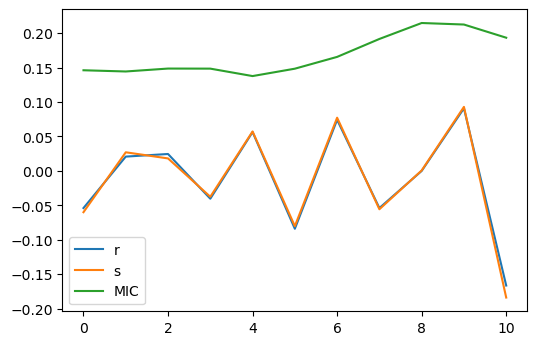

In [12]:
plt.figure(1,dpi=100)

plt.plot(rx2,label = "r")
plt.plot(sx2,label = "s")
plt.plot(MIC[1:12],label = "MIC")
plt.legend()
plt.show()